**Predicting the Outcome of diabetes using various models**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
sns.set_style('darkgrid')

## Question 1 (5 pts): 

Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

The dataset seems to be a comprehensive collection of information from over 800 females from the Pima Indian heritage about their health stats to predict the probablity of these women having diabetes. 

In [2]:
# Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
# Viewing the dimensions
print(diabetes_data.shape)

(768, 9)


In [4]:
# Setting correct data types 
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('category')

In [5]:
# Confirming change
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [6]:
# Creating a summary of the database stats
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Question 2 (5 pts): 

Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

Univariate pattern:

The pattern for this is the number of pregnancies within this database. Upon using sorting and visualizations, it is evident that most women in this database have been pregnant atleast once or twice or even zero number of times. This helps us give a good picture of how pregnancies affects the prediction

Pairwise pattern:

This visualization aims to deduce a relationship between BMI and Glucose Levels to see if there is a correlation. Based on the analysis, there is a 0.22 correlation. This means that they move fairly together. Diabities were present in females aged 20 - 50 years old and those who have a higher glucose level. 

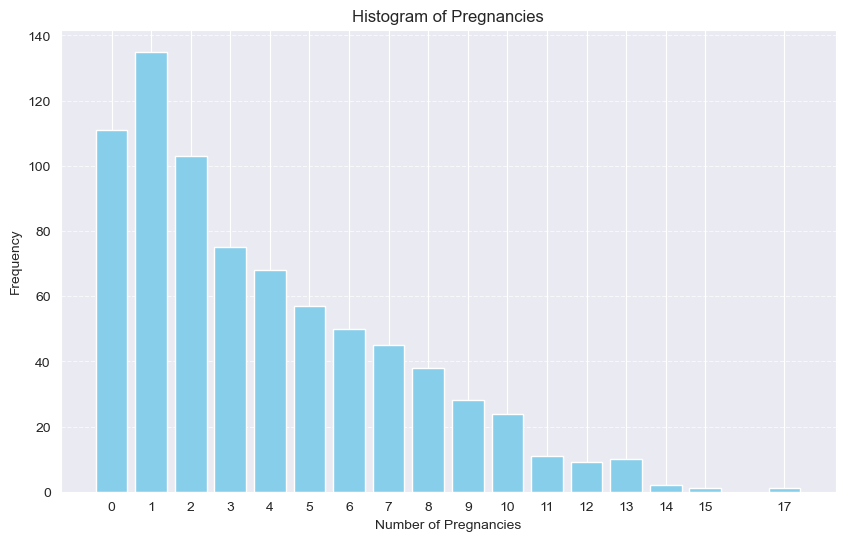

In [7]:
# Univariate pattern

# Calculating the frequency of each value of 'Pregnancies' column
pregnancies_frequency = diabetes_data['Pregnancies'].value_counts().sort_index()

# Plotting a histogram for the number of pregnancies
plt.figure(figsize=(10, 6))
plt.bar(pregnancies_frequency.index, pregnancies_frequency.values, color='skyblue')
plt.title('Histogram of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.xticks(pregnancies_frequency.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

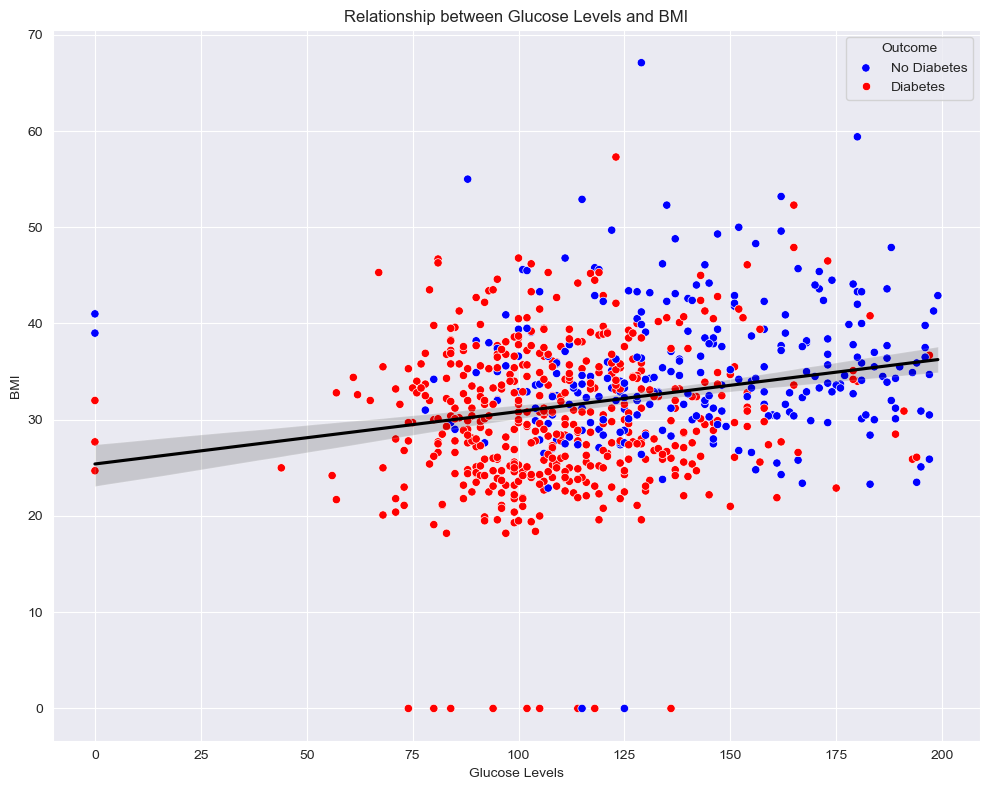

Correlation Coefficient: 0.22


In [8]:
# Pairwise patterns

# Plotting a scatter plot with a regression line for a relationship with Glucose and 
colors = {0: 'red', 1: 'blue'}

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', palette=colors, data=diabetes_data)
sns.regplot(x='Glucose', y='BMI', data=diabetes_data, scatter=False, color='black')
plt.title('Relationship between Glucose Levels and BMI')
plt.xlabel('Glucose Levels')
plt.ylabel('BMI')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_coefficient = diabetes_data['Glucose'].corr(diabetes_data['BMI'])
correlation_coefficient = round(correlation_coefficient, 2)
print("Correlation Coefficient:", correlation_coefficient)

## Question 3 (5 pts): 

Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

No missing values were found. Data looks appropriate and valid. 

In [9]:
# Checking for missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Checking for invalid values
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Question 4 (10 pts): 

Partition the data into train/test sets. After which, perform the following:
- encode any categorical data
- normalize numeric data.

The data did not need encoding as the training set did not involve categorical values. Numeric features in the training set were normalized.

In [17]:
d_data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Partitioning the dataset
X = d_data[['HighBP', 'Smoker', 'PhysActivity', 'BMI', 'HvyAlcoholConsump', 'AnyHealthcare','MentHlth','Age','Income']]
y = d_data['Diabetes_012']         

X_train, X_test, y_train, y_test = train_test_split(X,              
                                                    y,              
                                                    test_size=0.3,  
                                                    random_state=10, 
                                                    stratify=y     
                                                   )

In [18]:
# Copying training and testing data
X_train = X_train.copy()
X_test  = X_test.copy()

In [19]:
# Normalizing the numeric features
scaler = StandardScaler()
scaler.fit(X_train[['HighBP', 'Smoker', 'PhysActivity', 'BMI', 'HvyAlcoholConsump', 'AnyHealthcare','MentHlth','Age','Income']])
X_train[['HighBP', 'Smoker', 'PhysActivity', 'BMI', 'HvyAlcoholConsump', 'AnyHealthcare','MentHlth','Age','Income']] = scaler.transform(X_train[['HighBP', 'Smoker', 'PhysActivity', 'BMI', 'HvyAlcoholConsump', 'AnyHealthcare','MentHlth','Age','Income']])

## Question 5 (20 pts): 

Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM model, train and evaluate it.
- Use GridSearchCV to tune at least two hyperparameters.**
- Perform cross validation.
- Display: 1) the best model/parameters and 2) the best score that was obtained.

SVC model was used as an SVM model since the predictions are linear and categorize itself in two categories. Hyperparameters were used to optimize the best parameters as closely as possible. Model was evaluated using the 'score' function. The model was modified to fit the new best parameters to improve accuracy. 

In [ ]:
# Initializing the SVM model
svm = SVC() 
svm.fit(X_train, y_train) 

In [15]:
# Evaluating the model

# Displaying the accuracy score
accuracy_score = svm.score(X_test, y_test)
accuracy_score = round(accuracy_score, 2)

print('Accuracy Score:', accuracy_score)

Accuracy Score: 0.65


In [16]:
# Instantiate an SVM model
svm_model = SVC()

# Defining the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto']  
}

# Performing cross-validation using GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Training the model using the best hyperparameters
best_svm_model = grid_search.best_estimator_

# Evaluating the model on the testing set
y_pred = best_svm_model.predict(X_test)

# Displaying the best model/parameters and the best score obtained
print("Best Model/Parameters:", grid_search.best_params_)
print("Best Score:", round(grid_search.best_score_,2))

Best Model/Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Score: 0.69


## Question 6 (5 pts): 

Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

The raw, untuned verison of the model had an accuracy of 65%. Upon tuning using GridSearchCV, optimal parameters used a C of 0.1 and 'scale' as its gamma. After implementing the model with best hyperparameters, the accuracy went up to 69%. Thats a 4% increase in the accuracy of the model. 

The model is fairly accurate and the following implementation can be done to improve it:

- Use a more comprehensive and accurate models and analysis methods.
- Make sure the data has more health features so it can accurately predict diabetes.
- Hypertune the model further to improve its realiabilty.

I would not advocate its use in the medical industry due to the following reasons:

- This data might have baises and inaccurate records that may or may not be intentional. It also restricts the demographics to Pima Indian women and exludes any men in the same hertiage and men and women of other cultures.
- The accuracy is only 69% which is not a good score for medically reliable models. However, after tuning it better and inputting accurate and real time metrics, this model may actually be used to predict diabetes.
- Since the nature of diabetes is unpredictable, using historic and limited number of features may not give us the full picture and break down causes that led to diabetes. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


Websites that helped complete this assignment:

- https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=Here%20C%2C%20gamma%20and%20kernels,using%20the%20Cross%2DValidation%20method.